<a href="https://colab.research.google.com/github/Hirak-Pandya/CourseraREACT/blob/master/IBM_Summer_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Portfolio optimization using Efficient Frontier 

NSE Equity - https://docs.google.com/spreadsheets/d/1Du-_917AzZQr7txoJFQvrXzEjAAfLSsnJaCiNSGnYzI/edit?usp=sharing

In [ ]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
import seaborn as sns
import math
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [ ]:

nstocks = int(input("Enter the no. of stocks :"))
assets = [ ]
for i in range(0,nstocks):
  data = input("Enter stock name")
  data+='.ns' 
  assets.append(data)
  i+=1
print(assets)

Enter the no. of stocks :2
Enter stock nameABB
Enter stock nameRELIANCE
['ABB.ns', 'RELIANCE.ns']


In [ ]:
StartDate = '2020-01-01'
EndDate = '2021-01-02'


In [ ]:
df = pd.DataFrame()
for stocks in assets:
  df[stocks] = web.DataReader(stocks,data_source='yahoo',start= StartDate, end = EndDate)['Adj Close']
df

,ABB.ns,RELIANCE.ns
Date,,
2020-01-01,1259.957520,1485.053467
2020-01-02,1264.059570,1510.335571
2020-01-03,1291.456421,1512.155518
2020-01-06,1257.027344,1477.085083
2020-01-07,1276.317627,1499.809570
...,...,...
2020-12-28,1208.763184,1996.876221
2020-12-29,1194.367920,1983.668701
2020-12-30,1200.175537,1989.101196


In [ ]:
stocks_pct_change = df.pct_change().dropna()
stocks_pct_change.head()

,ABB.ns,RELIANCE.ns
Date,,
2020-01-02,0.003256,0.017024
2020-01-03,0.021674,0.001205
2020-01-06,-0.026659,-0.023192
2020-01-07,0.015346,0.015385
2020-01-08,0.003022,-0.007510


In [ ]:
variance_stocks = stocks_pct_change.var()
variance_stocks


ABB.ns         0.000543
RELIANCE.ns    0.000874
dtype: float64

In [ ]:
std_stocks = np.std(stocks_pct_change)*np.sqrt(250)
print(std_stocks)

ABB.ns         0.367646
RELIANCE.ns    0.466619
dtype: float64


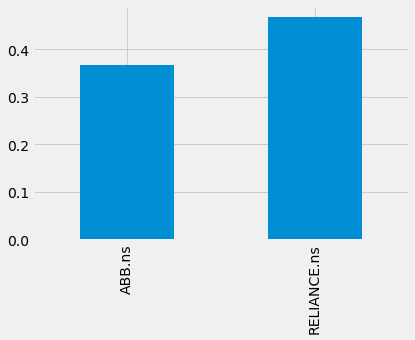

In [ ]:
std_stocks.plot(kind='bar')

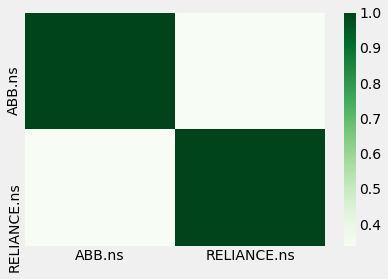

In [ ]:
stocks_corr = stocks_pct_change.corr()
sns.heatmap(stocks_corr, 
        xticklabels=stocks_corr.columns,
        yticklabels=stocks_corr.columns,
            cmap="Greens")

In [ ]:
stock_mean = df.resample('M').last().pct_change().mean()
stock_mean

ABB.ns         0.005483
RELIANCE.ns    0.037872
dtype: float64